# Section I: Satellite image analysis


['.DS_Store', 'satellite_20221203.tiff']


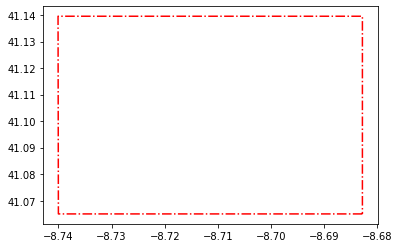

In [2]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import pandas as pd
import os
from rasterio.plot import show, adjust_band
from shapely.geometry import Polygon, Point

print(os.listdir("./../tif/"))
filepath = "./../tif/satellite_20221203.tiff"

plg = pd.read_csv("./../csv/polygon.csv").to_numpy()
plg_sh = Polygon(plg)

plt.plot(plg[:, 1], plg[:, 0], 'r-.')

In [3]:
"""
Section for Satellite
"""
@np.vectorize
def get_legal_indices(lat, lon) -> bool:
    point = Point(lat, lon)
    legal = False
    if plg_sh.contains(point):
        legal = True
    return legal

img = rasterio.open(filepath)
# img = georaster.MultiBandRaster(file)
b1 = img.read(1)
b2 = img.read(2)
b3 = img.read(3)

print("hello")
height = b1.shape[0]
width = b1.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(img.transform, rows, cols)
lons = np.array(xs).flatten()
lats = np.array(ys).flatten()

b1 = b1.flatten()
b2 = b2.flatten()
b3 = b3.flatten()

ind_legal = get_legal_indices(lats, lons)

# plot


hello


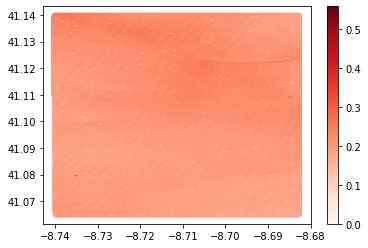

In [10]:
# plot
bimg = b1 + b2 + b3
plt.scatter(lons[ind_legal], lats[ind_legal], c=bimg[ind_legal], cmap="Reds")
plt.colorbar()
plt.show()

In [11]:
# save 
lat_selected = lats[ind_legal]
lon_selected = lons[ind_legal]
val = bimg[ind_legal]

data_satellite = np.stack((lat_selected, lon_selected, val), axis=1)
df = pd.DataFrame(data_satellite, columns=['lat', 'lon', 'value'])
df.to_csv('./../csv/satellite.csv', index=False)

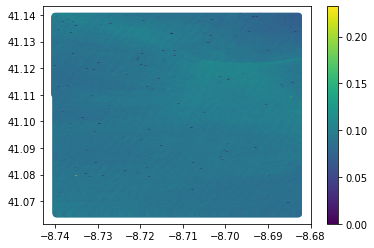

In [14]:
bimg = b1 + 
plt.scatter(lons[ind_legal], lats[ind_legal], c=b3[ind_legal])
plt.colorbar()
plt.show()

In [24]:
import PIL
import cv2


In [22]:
from PIL import Image
from matplotlib import cm
im = Image.fromarray(np.uint8(cm.RdBu(b2)*255))


In [ ]:
image = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(blurred, 10, 100)

cv2.imshow("Original image", image)
cv2.imshow("Edged image", edged)
cv2.waitKey(0)